# 과적합/과소적합 테스트

## 1. 데이터 로드

In [6]:
import tensorflow as tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

vocab_size = 1000
imdb = keras.datasets.imdb
(train_datas, train_labels), (test_datas, test_labels) = imdb.load_data(num_words = vocab_size)

## 2. 멀티 핫 시퀀싱

In [7]:
def multi_hot_sequences(sequence, dimension):
    results = np.zeros((len(sequence), dimension))
    for i,word_indices in enumerate(sequence):
        results[i,word_indices] = 1.0
    return results

train_datas = multi_hot_sequences(train_datas, dimension=vocab_size)
test_datas = multi_hot_sequences(test_datas, dimension=vocab_size)

In [8]:
train_labels = np.reshape(train_labels, (-1,1))
test_labels = np.reshape(test_labels, (-1,1))

## 3. 모델 정의

In [9]:
baseline_model = keras.Sequential([
	keras.layers.Dense(16, activation="relu", input_shape=(vocab_size,)),
 	keras.layers.Dense(16, activation="relu"),
 	keras.layers.Dense(1, activation="sigmoid")
])

baseline_model.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy","binary_crossentropy"])

baseline_model.summary()

bigger_model = keras.Sequential([
    keras.Input(shape=(vocab_size,)),
	keras.layers.Dense(512, activation="relu"),
 	keras.layers.Dense(512, activation="relu"),
 	keras.layers.Dense(1, activation="sigmoid")
])

bigger_model.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy","binary_crossentropy"])

bigger_model.summary()

smaller_model = keras.Sequential([
    keras.Input(shape=(vocab_size,)),
	keras.layers.Dense(4, activation="relu"),
 	keras.layers.Dense(4, activation="relu"),
 	keras.layers.Dense(1, activation="sigmoid")
])

smaller_model.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy","binary_crossentropy"])

smaller_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 775,681 (2.96 MB)

 Trainable params: 775,681 (2.96 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 4)              │         4,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,029 (15.74 KB)

 Trainable params: 4,029 (15.74 KB)

 Non-trainable params: 0 (0.00 B)

## 4. 모델 학습

In [10]:
baseline_history = baseline_model.fit(train_datas,
                                      train_labels, 
                                      epochs=200,
                                      batch_size=512,
                                      validation_data=(test_datas,test_labels))

bigger_history = bigger_model.fit(train_datas,
                                      train_labels, 
                                      epochs=200,
                                      batch_size=512,
                                      validation_data=(test_datas,test_labels))

smaller_history = smaller_model.fit(train_datas,
                                      train_labels, 
                                      epochs=200,
                                      batch_size=512,
                                      validation_data=(test_datas,test_labels))

Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6973 - binary_crossentropy: 0.5945 - loss: 0.5945 - val_accuracy: 0.8118 - val_binary_crossentropy: 0.4557 - val_loss: 0.4557
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8417 - binary_crossentropy: 0.3847 - loss: 0.3847 - val_accuracy: 0.8532 - val_binary_crossentropy: 0.3519 - val_loss: 0.3519
Epoch 3/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8650 - binary_crossentropy: 0.3259 - loss: 0.3259 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3336 - val_loss: 0.3336
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8716 - binary_crossentropy: 0.3107 - loss: 0.3107 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3303 - val_loss: 0.3303
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8765 - binary_crossentropy: 0.3009 - loss: 0.3009 - val_accuracy: 0.8591 - val_binary_crossentropy: 0.3312 - val_loss: 0.3312
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

## 5. 결과 그래프 출력

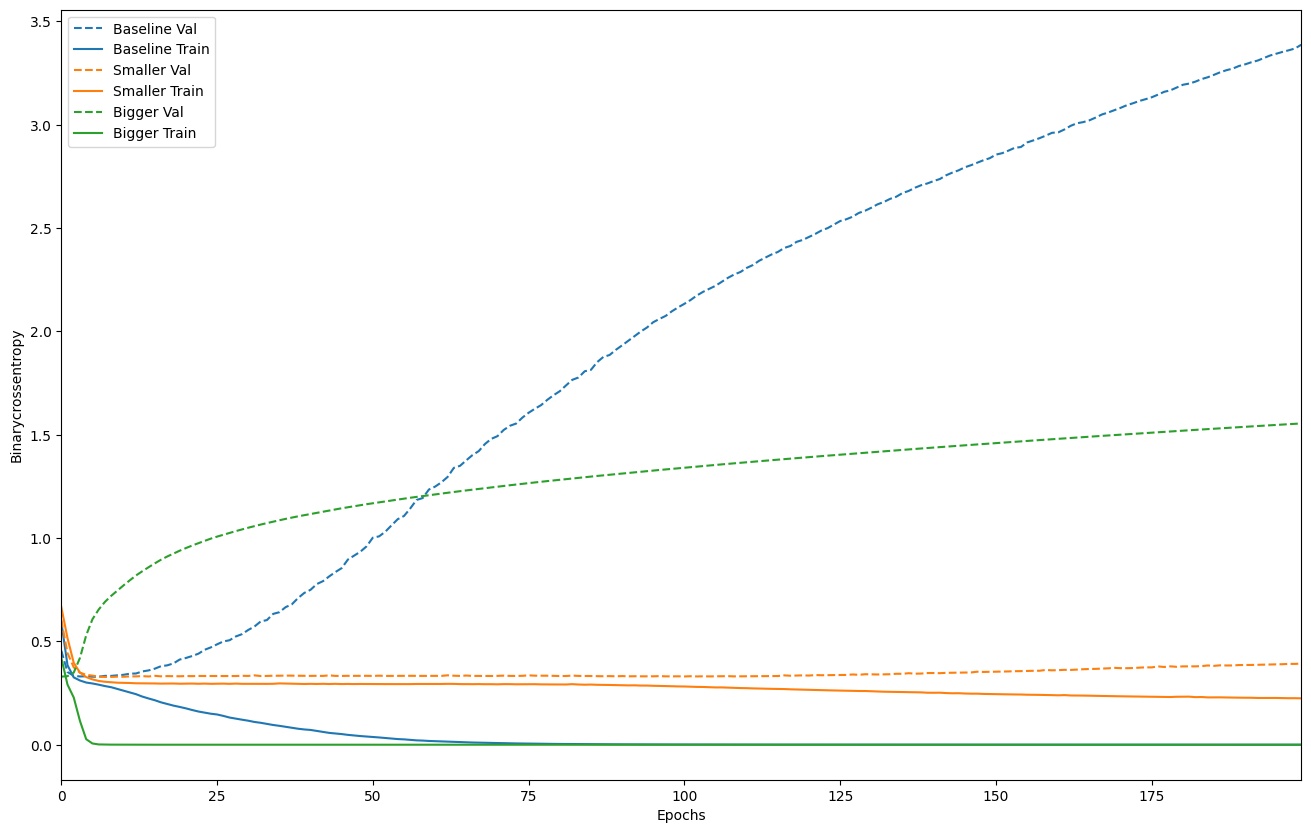

In [11]:
def plot_history(histories, key="binary_crossentropy"):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+" Val")
        plt.plot(history.epoch, history.history[key],
                       color=val[0].get_color(),
                       label=name.title()+ " Train")
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_','').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
    plt.show()
    
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])    